Mean Absolute Error (MAE): 72.15
R² Score: 0.93


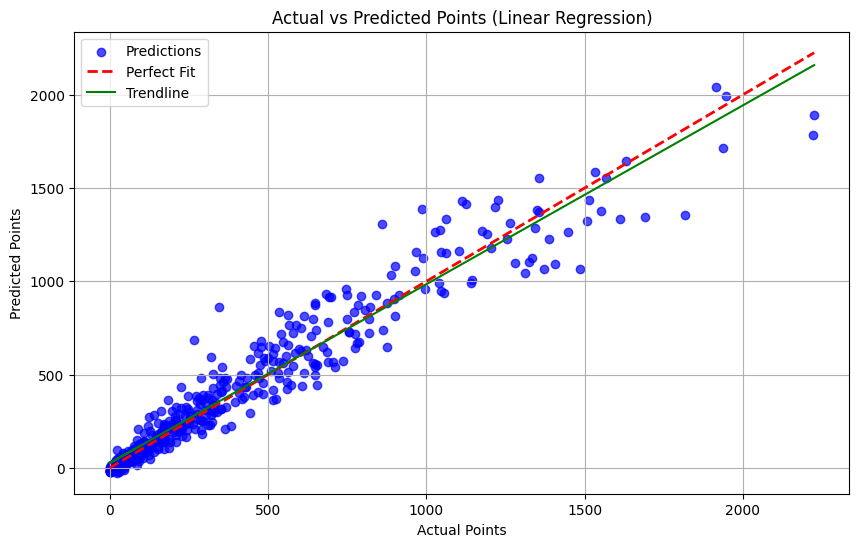

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

file_path = 'all_nba_playerstats_2021-2025.csv'
data = pd.read_csv(file_path)

features = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']
target = 'PTS'

data = data.dropna(subset=features + [target])

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', label='Trendline')

plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


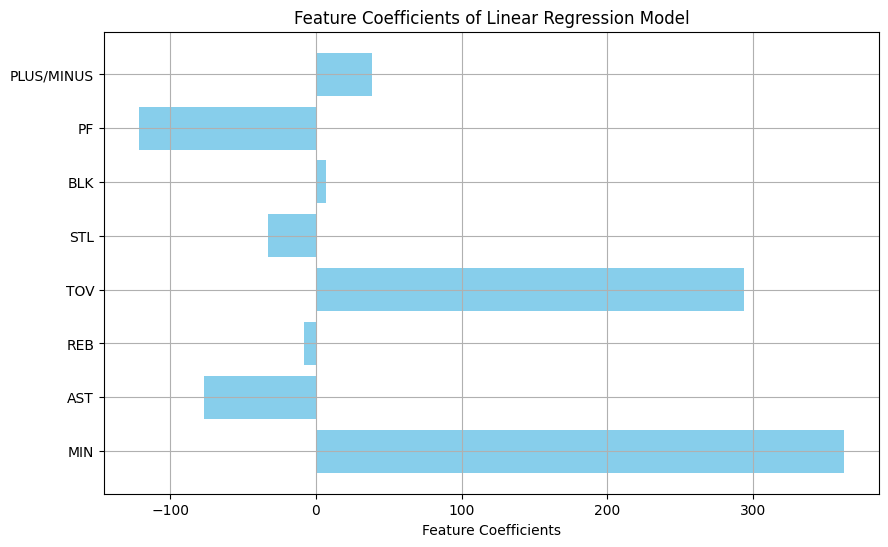

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

file_path = 'all_nba_playerstats_2021-2025.csv'
data = pd.read_csv(file_path)

features = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']
target = 'PTS'

data = data.dropna(subset=features + [target])

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

coefficients = lr_model.coef_

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Feature Coefficients')
plt.title('Feature Coefficients of Linear Regression Model')
plt.grid(True)
plt.show()


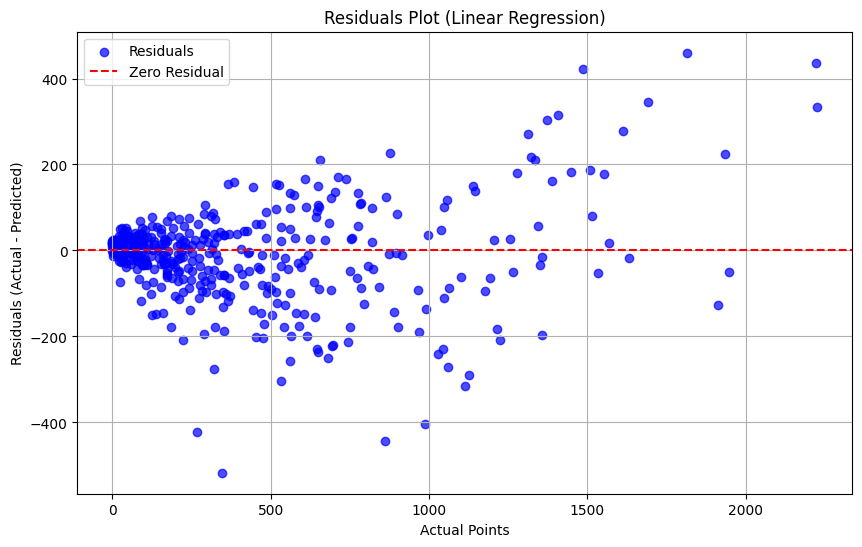

In [101]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
import statsmodels.api as sm
import pandas as pd


feature_columns = ['FGM', '3PM', 'FTM', 'FGA', 'MIN', 'AST', 'REB']
target_column = 'PTS'

X = player_stats_df[feature_columns]
y = player_stats_df[target_column]

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

p_values = results.pvalues[1:]

for feature, p_value in zip(feature_columns, p_values):
    print(f"Feature: {feature}, P-value: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.000e+32
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:57:30   Log-Likelihood:                 58604.
No. Observations:                2218   AIC:                        -1.172e+05
Df Residuals:                    2210   BIC:                        -1.171e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.133e-12   2.66e-14     42.600      0.0

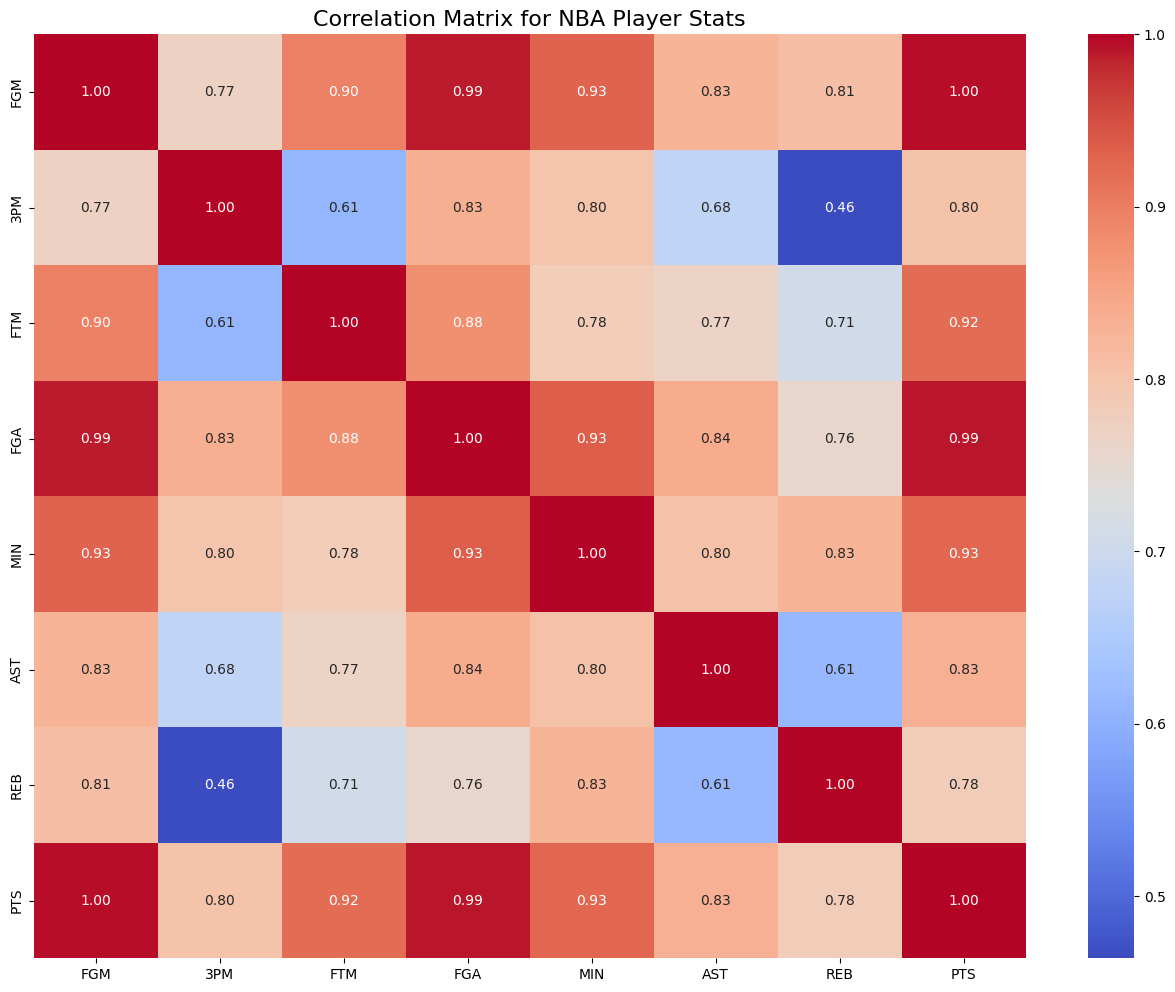

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'all_nba_playerstats_2021-2025.csv'
player_stats_df = pd.read_csv(file_path)

features = ['FGM', '3PM', 'FTM', 'FGA', 'MIN', 'AST', 'REB', 'PTS']

player_stats_df = player_stats_df.dropna(subset=features)

correlation_matrix = player_stats_df[features].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for NBA Player Stats", fontsize=16)
plt.show()
